# **Capstone project: Providing data-driven suggestions for HR**

# **PACE stages**


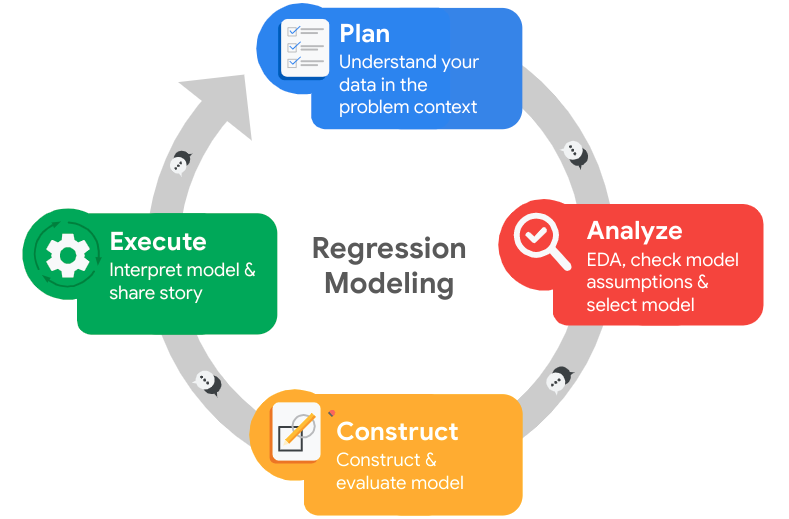

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 



Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
### YOUR CODE HERE ### 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
### YOUR CODE HERE ###
df0.rename(columns={'number_project':'number_of_projects','time_spend_company':'years_spent_in_company',
                    'Work_accident':'accident_at_work','last_evaluation':'last_evaluation_score',
                    'promotion_last_5years':'promoted_last_5_yrs','Department':'department','average_montly_hours':'average_monthly_hours'}, inplace = True)

# Display all column names after the update
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation_score,number_of_projects,average_monthly_hours,years_spent_in_company,accident_at_work,left,promoted_last_5_yrs,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
### YOUR CODE HERE ###
df0.isnull().any()

satisfaction_level        False
last_evaluation_score     False
number_of_projects        False
average_monthly_hours     False
years_spent_in_company    False
accident_at_work          False
left                      False
promoted_last_5_yrs       False
department                False
salary                    False
dtype: bool

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

In [9]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[df0.duplicated()]

,satisfaction_level,last_evaluation_score,number_of_projects,average_monthly_hours,years_spent_in_company,accident_at_work,left,promoted_last_5_yrs,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df1=df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df1.head()

,satisfaction_level,last_evaluation_score,number_of_projects,average_monthly_hours,years_spent_in_company,accident_at_work,left,promoted_last_5_yrs,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

Text(0.5, 0, 'Tenure')

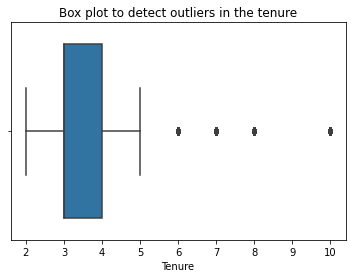

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
sns.boxplot(x='years_spent_in_company',data=df1)
plt.title('Box plot to detect outliers in the tenure')
plt.xlabel("Tenure")

In [12]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
percentile25=df1['years_spent_in_company'].quantile(0.25)
percentile75=df1['years_spent_in_company'].quantile(0.75)

iqr=percentile75-percentile25

upper_limit=percentile75 + 1.5 * iqr
lower_limit=percentile25 - 1.5 * iqr

print("Upper limit is: ",upper_limit)
print("Lower limit is: ",lower_limit)

#Isolating the outliers
len(df1[(df1['years_spent_in_company']>upper_limit) | (df1['years_spent_in_company']<lower_limit)])

Upper limit is:  5.5
Lower limit is:  1.5


824

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print(df1['left'].value_counts())
print()
# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print(df1['left'].value_counts(normalize=True))

0    10000
1     1991
Name: left, dtype: int64

0    0.833959
1    0.166041
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

Text(0.5, 1.0, 'Satisfaction Level by the tenure')

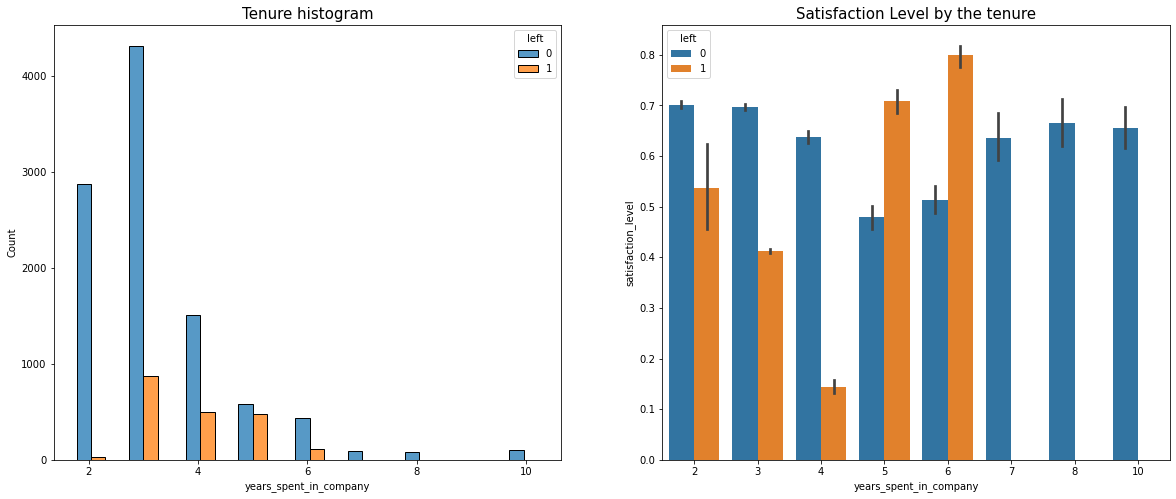

In [14]:
fig, ax = plt.subplots(1, 2, figsize = (20,8))
sns.barplot(x='years_spent_in_company',y='satisfaction_level',data=df1,ax=ax[1],hue='left')
sns.histplot(data=df1, x='years_spent_in_company',ax=ax[0],hue='left',multiple='dodge',shrink=6)
ax[0].set_title('Tenure histogram', fontsize='15')
ax[1].set_title('Satisfaction Level by the tenure', fontsize='15')

Employees who did a lot of projects were not given a considerably high pay

Text(0.5, 1.0, 'Number of projects by salary')

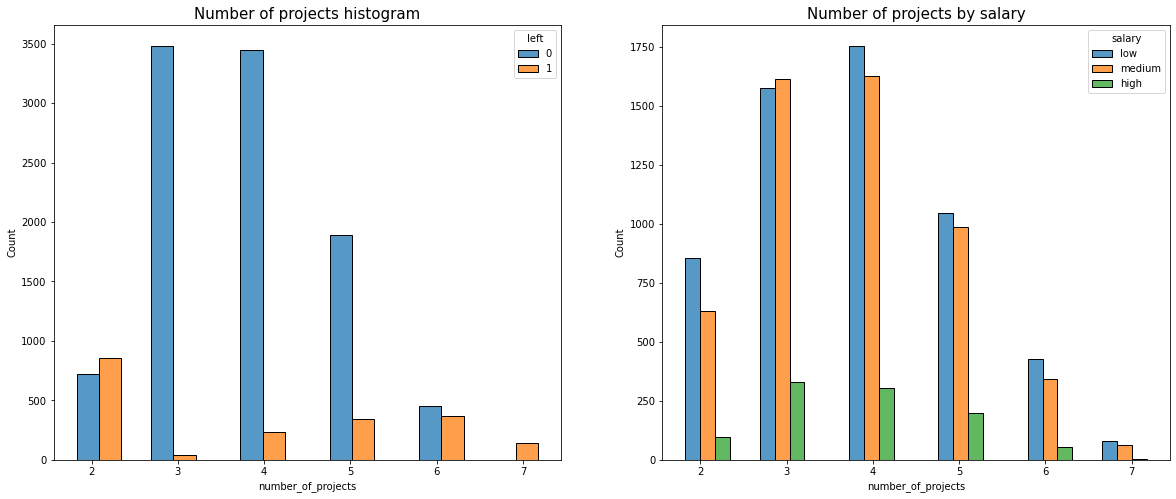

In [15]:
fig, ax = plt.subplots(1, 2, figsize = (20,8))
sns.histplot(data=df1,x='number_of_projects',hue='salary',multiple='dodge',shrink=3,ax=ax[1])
sns.histplot(data=df1,x='number_of_projects',hue='left',multiple='dodge',shrink=3,ax=ax[0])
ax[0].set_title('Number of projects histogram', fontsize='15')
ax[1].set_title('Number of projects by salary', fontsize='15')

The scatterplot indicates two groups of employees who left: overworked employees who performed very well and 
employees who worked slightly under the nominal monthly average with a low score.

Text(0.5, 1.0, 'Evaluation score by monthly working hours')

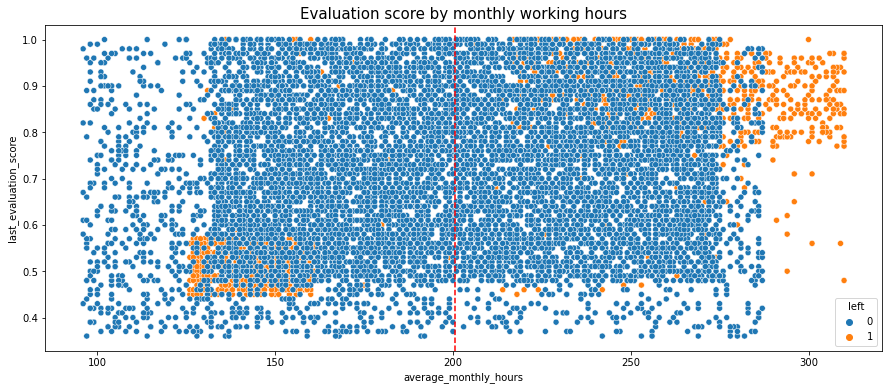

In [16]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=df1,x='average_monthly_hours',y='last_evaluation_score',hue='left')
plt.axvline(x=df1['average_monthly_hours'].mean(), color='red', ls='--')
plt.title('Evaluation score by monthly working hours',fontsize=15)

Text(0.5, 1.0, 'Accident histogram')

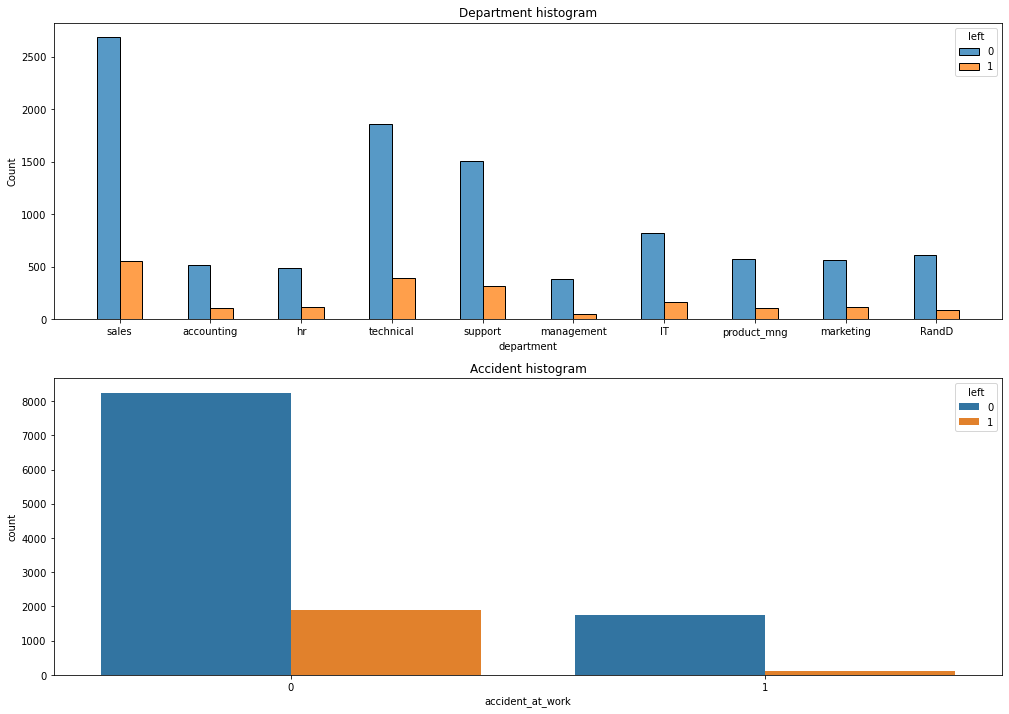

In [17]:
fig, ax = plt.subplots(2, 1, figsize = (17,12))
sns.histplot(data=df1, x='department', hue='left', hue_order=[0, 1], multiple='dodge', shrink=.5,ax=ax[0])
ax[0].set_title('Department histogram')
sns.countplot(data=df1,x='accident_at_work',hue='left',ax=ax[1])
ax[1].set_title('Accident histogram')

The plot shows the :
very few employees who were promoted in the last five years left
all of the employees who left were working the longest hours

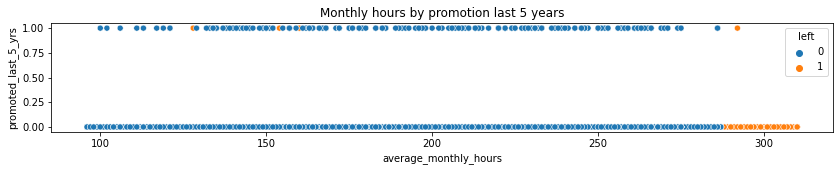

In [18]:
plt.figure(figsize=(14, 2))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promoted_last_5_yrs',hue='left')
plt.title('Monthly hours by promotion last 5 years');

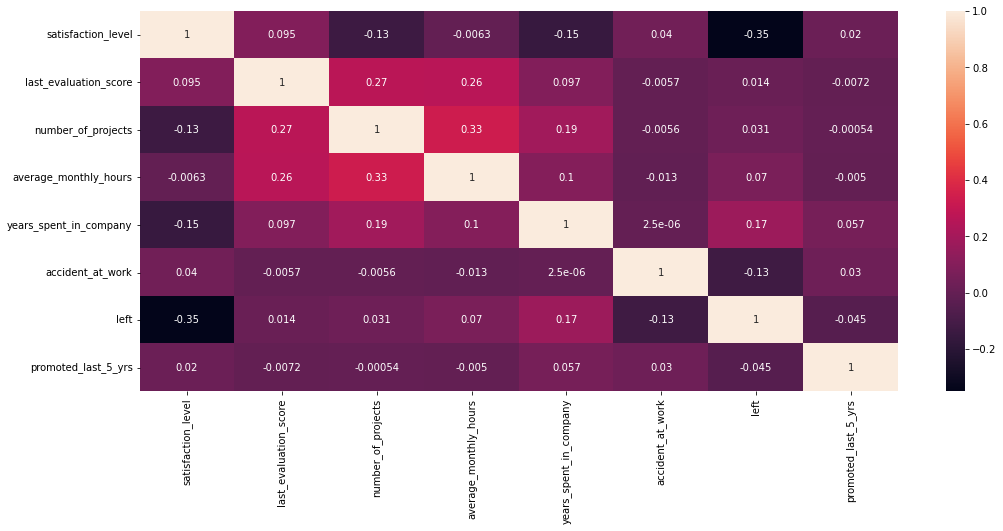

In [19]:
plt.figure(figsize=(17,7))
sns.heatmap(df1.corr(),annot=True)

INSIGHTS:
It appears that employees are leaving the company as a result of poor management. Leaving is tied to longer working hours, many projects, and generally lower satisfaction levels. It can be ungratifying to work long hours and not receive promotions or good evaluation scores.  There's a group of employees at this company who are probably burned out.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

The goal is to predict whether an employee leaves the company, which is a categorical outcome. So this task is a classification task. Since the outcome variable left can be either 1 (indicating employee left) or 0 (indicating employee didn't leave).

### Identify the types of models most appropriate for this task.

Since this is a classification task we can use either logistic regression or decision tree cllassifier.

### Modeling

Add as many cells as you need to conduct the modeling process.

## Logistic Regression

In [20]:
df1.dtypes

satisfaction_level        float64
last_evaluation_score     float64
number_of_projects          int64
average_monthly_hours       int64
years_spent_in_company      int64
accident_at_work            int64
left                        int64
promoted_last_5_yrs         int64
department                 object
salary                     object
dtype: object

In [21]:
df_encoded=df1.copy()
df_encoded['salary']=df_encoded['salary'].replace({'low':0,'medium':1,'high':2})

In [22]:
df_encoded=pd.get_dummies(df_encoded,drop_first=False)

Since logistic regression is quite sensitive to outliers, it would be a good idea at this stage to remove the outliers in the tenure column that were identified earlier.

In [23]:
df_logistic=df_encoded[(df_encoded['years_spent_in_company'] >= lower_limit) & (df_encoded['years_spent_in_company'] <= upper_limit)]
df_logistic.head()

,satisfaction_level,last_evaluation_score,number_of_projects,average_monthly_hours,years_spent_in_company,accident_at_work,left,promoted_last_5_yrs,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [24]:
X=df_logistic.drop('left',axis=1)
y=df_logistic['left']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [26]:
clf=LogisticRegression(random_state=42,max_iter=500)
model=clf.fit(X_train,y_train)

In [27]:
model.coef_

array([[-4.34221595e+00, -1.15444697e-02, -4.86120495e-01,
         3.57214959e-03,  1.10422498e+00, -1.50082616e+00,
        -1.16290829e+00, -5.21514963e-01, -8.04364757e-02,
        -3.22737318e-01, -2.86185282e-01, -2.65958307e-03,
        -1.96840383e-01, -1.13398552e-01, -9.98545309e-02,
         3.32141266e-02,  2.17614136e-02,  2.83189803e-02]])

In [28]:
model.intercept_

array([-1.31819065])

In [29]:
y_pred=model.predict(X_test)

In [30]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

Accuracy: 0.8194842406876791
Precision: 0.44086021505376344
Recall: 0.2611464968152866
F1 Score: 0.328


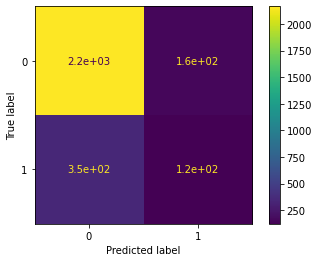

In [31]:
cm=confusion_matrix(y_test,y_pred,labels=clf.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90      2321
           1       0.44      0.26      0.33       471

    accuracy                           0.82      2792
   macro avg       0.65      0.60      0.61      2792
weighted avg       0.79      0.82      0.80      2792



The classification report above shows that the logistic regression model got a precision of 79%, recall of 82%, f1-score of 80% , and accuracy of 82%. However, the employees who are predicted to leave , the scores are significantly lower.

## Decision Tree

(Since decision trees are not affected by outliers since the partioning happens based on the samples within the split ranges and not based on absolute values it is not required to remove them.)

In [33]:
X=df_encoded.drop('left',axis=1)
y=df_encoded['left']
y

0        1
1        1
2        1
3        1
4        1
        ..
11995    0
11996    0
11997    0
11998    0
11999    0
Name: left, Length: 11991, dtype: int64

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

In [35]:
decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(X_train,y_train)
dt_pred=decision_tree.predict(X_test)

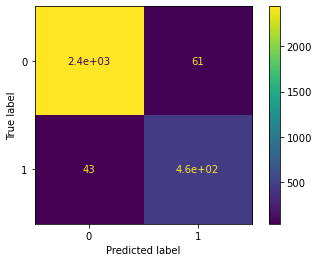

In [51]:
cm = confusion_matrix(y_test, dt_pred, labels = decision_tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = decision_tree.classes_)
disp.plot()

PLOT THE TREE

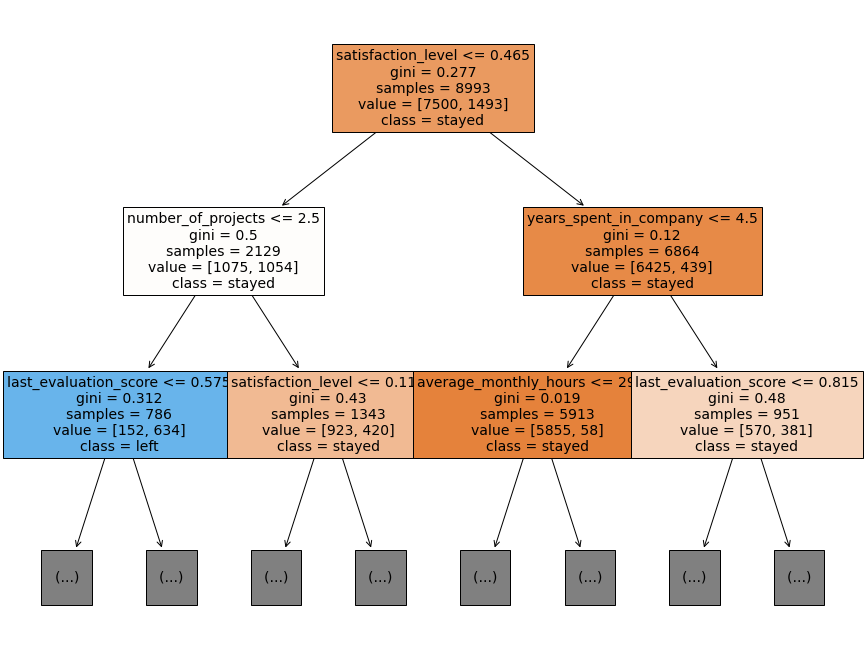

In [36]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,12))
plot_tree(decision_tree,max_depth=2,fontsize=14,feature_names=X.columns,class_names={0:'stayed',1:'left'},filled=True)
plt.show()

Using the `feature_importances_` attribute to fetch the relative importances of each feature in the data.

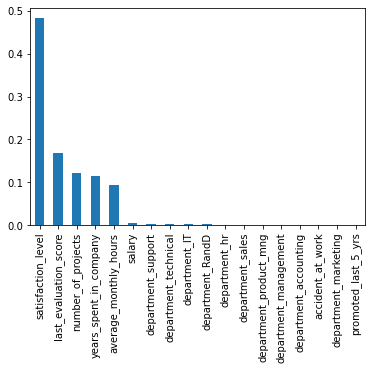

In [52]:
importances=decision_tree.feature_importances_
forest_importances=pd.Series(importances,index=X.columns).sort_values(ascending=False)
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax);

In [37]:
print("Decision Tree scores:")
print("Accuracy: ",accuracy_score(y_test, dt_pred,normalize=True))
print("Precision: ",precision_score(y_test, dt_pred))
print("Recall: ",recall_score(y_test, dt_pred))
print("F1 Score: ",f1_score(y_test, dt_pred))

Decision Tree scores:
Accuracy:  0.9653102068045364
Precision:  0.8817829457364341
Recall:  0.9136546184738956
F1 Score:  0.8974358974358975


### Hyperparameter Tuning

Decision trees can be particularly susceptible to overfitting. Combining hyperparameter tuning and grid search can help ensure this doesn't happen. For instance, setting an appropriate value for max depth could potentially help reduce a decision tree's overfitting problem by limiting how deep a tree can grow.Knowing how and when to adjust or tune a model can help a data professional significantly increase performance.  find the best values for the hyperparameters max_depth and min_samples_leaf using grid search and cross validation.

In [38]:
tree_params = {'max_depth':[4,6,8,10,15,16,17,18,19,20,30,40,50],
             'min_samples_leaf': [2,3,4,5,6,7,8,9],
             'min_samples_split':[2,4,6]
            }
            

scoring = {'accuracy', 'precision', 'recall', 'f1'}

### Check combination Values

In [39]:
clf = GridSearchCV(decision_tree, 
                   tree_params, 
                   scoring = scoring, 
                   cv=5, 
                   refit="f1")

In [40]:
clf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, 10, 15, 16, 17, 18, 19, 20, 30,
                                       40, 50],

In [41]:
clf.best_params_

{'max_depth': 8, 'min_samples_leaf': 6, 'min_samples_split': 2}

In [42]:
clf.best_score_

0.9431060115164163

In [56]:
results = pd.DataFrame(columns=['Model', 'F1', 'Recall', 'Precision', 'Accuracy'])

def make_results(model_name, model_object):
    """
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.  
    """

    # Get all the results from the CV and put them in a df.
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score).
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row.
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

 
    # Create table of results
    table = pd.DataFrame({'Model': ['Decision Tree',model_name],
                          'F1': [0.897435,f1],
                          'Recall': [0.913654,recall],
                          'Precision': [0.881782,precision],
                          'Accuracy': [0.965310,accuracy]
                         }
                        )

    return table

result_table = make_results("Tuned Decision Tree", clf)

result_table

,Model,F1,Recall,Precision,Accuracy
0,Decision Tree,0.897435,0.913654,0.881782,0.965310
1,Tuned Decision Tree,0.943106,0.910918,0.977761,0.981763


### Random Forest

In [44]:
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5,10,50], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3,4],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='f1')

In [45]:
rf1.fit(X_train,y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [46]:
rf1.best_params_

{'max_depth': 10,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

In [47]:
rf1.best_score_

0.9488982669243409

In [48]:
results = pd.DataFrame(columns=['Model', 'F1', 'Recall', 'Precision', 'Accuracy'])

def make_results(model_name, model_object):
    """
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.  
    """

    # Get all the results from the CV and put them in a df.
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score).
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row.
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

 
    # Create table of results
    table = pd.DataFrame({'Model': [model_name],
                          'F1': [f1],
                          'Recall': [recall],
                          'Precision': [precision],
                          'Accuracy': [accuracy]
                         }
                        )

    return table

result_table = make_results("Random Forest", rf1)

result_table

,Model,F1,Recall,Precision,Accuracy
0,Random Forest,0.948898,0.914949,0.985559,0.983654


# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics


- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

The logistic regression model got a precision of 79%, recall of 82%, f1-score of 80% , and accuracy of 82%. However, the employees who are predicted to leave , the scores are significantly lower.
The decision tree after the parameter tuning showed an accuracy of 98.1% and f1 score of 94.3% The random forest modestly outperformed the decision tree model.

### Conclusion, Recommendations, Next Steps

To retain employees, the following recommendations could be presented to the stakeholders:

Cap the number of projects that employees can work on.
Consider promoting employees who have been with the company for atleast four years, or conduct further investigation about why four-year tenured employees are so dissatisfied.
Either reward employees for working longer hours, or don't require them to do so.
If employees aren't familiar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off aren't explicit, make them clear.
Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts.
High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.